<center>
    <h1> Estudo de Caso </h1>
    <h2> Investigando sentimento extraído de publicações do Twitter com suporte do serviço LISA </h2>
    <h3> Bruno Luvizotto Carli </h3>
    <h4> brunolcarli@gmail.com </h4>
</center>

## Introdução

O presente estudo de caso pretende coletar dados de texto através da API do Twitter com a biblioteca python `tweepy` (ROESSLEIN, 2020), processá-los utilizando a API de processamento de linguagem natural `LISA` (CARLI, 2020) e apresentar os dados em gráficos gerados através das bibliotecas `pandas` (MCKINNEY, 2010) e `matplotlib` (HUNTER, 2007). O trabalho é parte integrante do artigo desenvolvido para o trabalho de conclusão de curso do curso de Engenharia de Software, na universidade Unicesumar.

Este estudo foi realizado na data do dia `14/05/2020` às `18:00`. O mesmo procedimento aplicado em outra data e horário poderá implicar em diferentes resultados obtidos após o processamente, em decorrência da obtenção de novos e diferentes dados vindos do Twitter.


## Metodologia

Como critério de busca dos textos serão utilizadas três palávras-chave para realizar as buscas:

- Unicesumar
- Faculdade
- TCC

O `tweepy` permite recuperar 100 amostras de tweets em uma requisição de busca, portanto este será o total de amostras coletadas para cada um dos termos da busca.

### Procedimentos

- **Etapa 1**:
    + Coletar dados para palávra-chave **Unicesumar**:
        - Coletar os dados no twitter;
        - Processar os dados na LISA;
    + Coletar dados para palávra-chave **Faculdade**:
        - Coletar os dados no twitter;
        - Processar os dados na LISA;
    + Coletar dados para palávra-chave **TCC**:
        - Coletar os dados no twitter;
        - Processar os dados na LISA;
- **Etapa 2**:
    + Unificar os dados em tabelas indexadas;
        - Criar dataframes que contenham as colunas e linhas pertinentes para análise comparativa;
    + Plotagem dos dados em gráficos de visualização

### Bibliotecas

As bibliotecas abaixo serão necessárias:

In [74]:
import json, requests
import tweepy
import matplotlib.pyplot as plt
import pandas as pd

### Autenticação na API do Twitter

Para ter acesso à API do twitter para coletar os dados é necessário um cadastro na página de desenvolvedores do twitter: https://developer.twitter.com/en

Após realizado oc adastro é ncessário criar uma aplicação para ter acesso aos tokens de acesso, que deverão ser atribuídos às varáives abaixo:

In [2]:
consumer_key = ""
consumer_secret = ""
access_token_secret = ""
access_token = ""

- Com as chaves de acesso definidas é possível através do `tweepy` conectar-se à API do Twitter:

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

- Definimos a `URL` contendo o *endpoint* para acesso ao backend **LISA**. Os dados serão enviados para este endereço para serem processados pela plataforma de processamento de linguagem natural através da *WEB* e retornando o resultado do processamento:

In [4]:
URL = 'https://lisa--brunolcarli.repl.co/graphql/'

# Coletando os dados

Com as devidas configurações ajustadas, o próximo passo é coletar os dados. O procedimento requer a coleta e processamento dos dados a partir das palávras-chave definidas como critério de busca para o estudo.

## Etapa 1

### Coletar dados para o termo Unicesumar

In [62]:
# Solicita 100 tweets para o Twitter (100 é o máximo permitido pelo tweepy) buscando por Unicesumar
response = api.search('Unicesumar', count=100)

# Separa em uma lista somente o texto dos tweets
tweets = [tweet.text.encode('utf-8').decode('utf-8') for tweet in response]

# Define a consulta para LISA contendo os textos recebidos do twitter como entrada
data = f'''
query{{
  sentimentBatchExtraction(textList: {json.dumps(tweets)}){{
    count
    positiveOccurrencesCount
    neutralOccurrencesCount
    negativeOccurrencesCount
    positivePercentage
    neutralPercentage
    negativePercentage
    totalSentiment
    meanSentiment
  }}
}}
'''

# Envia a cosulta para LISA
request = requests.post(URL, json={'query': data})

# Carrega a resposta como JSON
output = json.loads(request.text)
values = output['data']['sentimentBatchExtraction']

In [63]:
# guarda o resultado em um dataframa Pandas
unicesumar_df = pd.DataFrame.from_dict(values, orient='index', columns=['Unicesumar'])

# Exibe os dados processados
unicesumar_df

,Unicesumar
count,100.000000
positiveOccurrencesCount,16.000000
neutralOccurrencesCount,40.000000
negativeOccurrencesCount,44.000000
positivePercentage,0.160000
neutralPercentage,0.400000
negativePercentage,0.440000
totalSentiment,-6.528261
meanSentiment,-2.176087


### Coletar dados para o termo Faculdade

In [64]:
# Solicita 100 tweets para o Twitter (100 é o máximo permitido pelo tweepy) buscando por Faculdade
response = api.search('Faculdade', count=100)

# Separa em uma lista somente o texto dos tweets
tweets = [tweet.text.encode('utf-8').decode('utf-8') for tweet in response]

# Define a consulta para LISA contendo os textos recebidos do twitter como entrada
data = f'''
query{{
  sentimentBatchExtraction(textList: {json.dumps(tweets)}){{
    count
    positiveOccurrencesCount
    neutralOccurrencesCount
    negativeOccurrencesCount
    positivePercentage
    neutralPercentage
    negativePercentage
    totalSentiment
    meanSentiment
  }}
}}
'''

# Envia a cosulta para LISA
request = requests.post(URL, json={'query': data})

# Carrega a resposta como JSON
output = json.loads(request.text)
values = output['data']['sentimentBatchExtraction']

In [65]:
# guarda o resultado em um dataframa Pandas
faculdade_df = pd.DataFrame.from_dict(values, orient='index', columns=['Faculdade'])

# Exibe os dados processados
faculdade_df

,Faculdade
count,100.000000
positiveOccurrencesCount,33.000000
neutralOccurrencesCount,41.000000
negativeOccurrencesCount,26.000000
positivePercentage,0.330000
neutralPercentage,0.410000
negativePercentage,0.260000
totalSentiment,-0.079009
meanSentiment,-0.026336


### Coletar dados para o termo TCC

In [66]:
# Solicita 100 tweets para o Twitter (100 é o máximo permitido pelo tweepy) buscando por TCC
response = api.search('TCC', count=100)

# Separa em uma lista somente o texto dos tweets
tweets = [tweet.text.encode('utf-8').decode('utf-8') for tweet in response]

# Define a consulta para LISA contendo os textos recebidos do twitter como entrada
data = f'''
query{{
  sentimentBatchExtraction(textList: {json.dumps(tweets)}){{
    count
    positiveOccurrencesCount
    neutralOccurrencesCount
    negativeOccurrencesCount
    positivePercentage
    neutralPercentage
    negativePercentage
    totalSentiment
    meanSentiment
  }}
}}
'''

# Envia a cosulta para LISA
request = requests.post(URL, json={'query': data})

# Carrega a resposta como JSON
output = json.loads(request.text)
values = output['data']['sentimentBatchExtraction']

In [67]:
# guarda o resultado em um dataframa Pandas
tcc_df = pd.DataFrame.from_dict(values, orient='index', columns=['TCC'])

# Exibe os dados processados
tcc_df

,TCC
count,100.000000
positiveOccurrencesCount,11.000000
neutralOccurrencesCount,25.000000
negativeOccurrencesCount,64.000000
positivePercentage,0.110000
neutralPercentage,0.250000
negativePercentage,0.640000
totalSentiment,-5.781645
meanSentiment,-1.927215


## Etapa 2

### Juntando os dados em uma tabela

Agora que os dados foram coletados e processados, pode-se agrupá-los em uma tabela para facilitar a viusalização dos dados. Pode-se verificar que todas as buscas retornaram 100 resultados e todos foram devidamente processados pela LISA.

In [68]:
# Agrupa as tabelas
frames = [
    unicesumar_df.transpose(),
    faculdade_df.transpose(),
    tcc_df.transpose()
]
full_table = pd.concat(frames)

# Exibe a tabela contendo todos os dados
full_table

,count,positiveOccurrencesCount,neutralOccurrencesCount,negativeOccurrencesCount,positivePercentage,neutralPercentage,negativePercentage,totalSentiment,meanSentiment
Unicesumar,100.0,16.0,40.0,44.0,0.16,0.40,0.44,-6.528261,-2.176087
Faculdade,100.0,33.0,41.0,26.0,0.33,0.41,0.26,-0.079009,-0.026336
TCC,100.0,11.0,25.0,64.0,0.11,0.25,0.64,-5.781645,-1.927215


## Comparação de ocorrências

No gráfico e tabela gerado a seguir é exibido uma contagem de ocorrências de tweets com teor positivo, neutro e negativo para cada termo pesquisado.

Para o termo "Unicesumar" pode-se verificar que a contagem de `post` negativos a respeito prevalece com 44% de ocorrências, mantendo 40% de neutralidade e apenas 16% de comentários positivos em relação ao objeto de pesquisa segundo os usuários do witter, certamente levando em consideração o recorte temporal que se refere ao momento no espaço-tempo utilizado para aquisição dos dados.

O termo "Faculdade" de acordo com a análise, descreve maior neutralidade (41%) quanto aos comentários publicados na rede social, apresentando ainda uma maior taxa de publicações positivas (33%) do que negativas (26%).

O termo "TCC" se mostra de acordo com os dados obtidos, como sendo objeto de maior estresse para os usuários, em decorrência da alta taxa de publicações avaliadas como negativas, apresentando valor acima da média (64%), mantendo assim como para o primeiro termo, uma quantidade de publicações positivas menor (11%) em comparação às publicações neutras (25%).

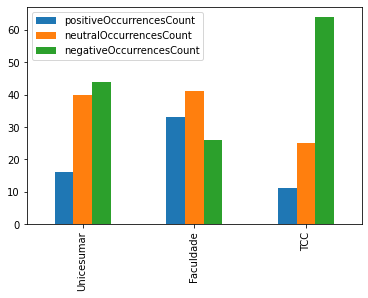

,positiveOccurrencesCount,neutralOccurrencesCount,negativeOccurrencesCount
Unicesumar,16.0,40.0,44.0
Faculdade,33.0,41.0,26.0
TCC,11.0,25.0,64.0


In [69]:
occurrences = full_table.filter(['positiveOccurrencesCount', 'neutralOccurrencesCount', 'negativeOccurrencesCount']).copy()
occurrences.plot(kind='bar')
plt.show()

occurrences

## Comparação da soma de sentimentos

O sentimento total é a soma de todos os sentimentos dos 100 tweets do objeto de estudo, representando uma avaliação global perante todas as opiniões coletadas. Para este estudo de caso, particularmente neste recorte de tempo em que os dados foram coletados, o estudo revela que as opiniões públicas a respeito de todos os termos é **negativa**. Pode-se inferir que nesta data e neste momento, inúmeros alunos de faculdades (incluindo a Unicesumar) encontram-se de alguma forma "frustrados" com trabalho de conclusão de curso, levando consequentemente a um aumento na taxa de negatividade encontrada aos avaliar outros objetos relativos (como "Faculdade" e "Unicesumar").

Por utro lado, o total de sentimento avaliado para o objeto de estudo "Faculdade" é relativamente inferior aos demais objetos de estudo, o que pode levar a ponderações como:

**No momento da realização deste estudo**:

- Os alunos da Unicesumar podem estar tendo dificuldade com seu TCC;
- O trabalho de conclusão de curso na unicesumar pode estar exigindo demasiado esforço dos alunos;
- Alunos de outras faculdades enfrentam menos problemas com TCC do que na Unicesumar;
- Alunos que reprovam no TCC podem publicar textos negativos em relação à Unicesumar por terem falhado em seu TCC;

Não pretende-se aqui concluir tais questões como verdadeiras, mas de maneira ingênua inferir na possibilidade da existência de tais relações.

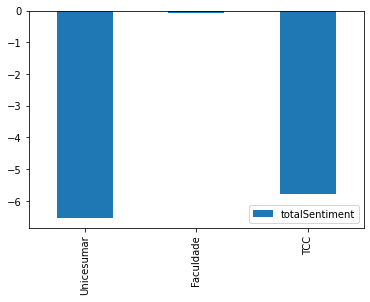

,totalSentiment
Unicesumar,-6.528261
Faculdade,-0.079009
TCC,-5.781645


In [71]:
total_sentiment = full_table.filter(['totalSentiment']).copy()
total_sentiment.plot(kind='bar')
plt.show()

total_sentiment

# Considerações Finais

Este estudo demonstrou a facilidade e viabilidade de implementação de estudos de avaliação de dados através da opinião pública em relação à um ou mais determinados objetos de estudo. O estudo comprova a usabilidade da API de processamento de linguagem natural desenvolvido para o Trabalho de Conclusão de Curso da universidade Unicesumar, de forma que o serviço utilizado realizou devidamente a tarefa proposta em seu projeto de desenvolvimento, cujo contempla executar tarefas de PLN e extração de sentimentos em texto através da internet, não sendo necessário a implementação do código-fonte nem inclusão de módulos e bibliotecas dedicados à este processamento.

Propõe-se neste momento ideias para trabalhos futuros a partir deste estudo:

- Análise em tempo real de trends ou termos buscados através das ferramentas de streaming da API do Twitter;
- Monitoramento periódico de um objeto de estudo, mineirando maior quantidade de dados em um recorte temporal relativamente extendido, possibilitando:
    + Visualizar momentos de mutabilidade, ascensção e queda das features em uma linha do tempo;
    + Maior assertividade quanto a veracidade das inferências;


# Referências

CARLI, Bruno Luvizotto. LISA: Lexical Interface fo Sentiment Analysis. In: CARLI, Bruno Luvizotto. LISA: Lexical Interface for Sentiment Analysis. 0.2.5. Online, 2020. Disponível em: https://github.com/brunolcarli/Lisa. Acesso em: 14 maio 2020.

HUNTER, John D. Matplotlib: A 2D graphics environment. Computing in science & engineering. In: HUNTER, John D. Matplotlib: A 2D graphics environment. Computing in science & engineering. 3.2.1. Online: IEEE, 2007. Disponível em: https://matplotlib.org/. Acesso em: 14 maio 2020.

MCKINNEY, Wes et al. Pandas: Data structures for statistical computing in python. In: MCKINNEY, Wes. Pandas: Data structures for statistical computing in python. 1.0.3. Online, 2010. Disponível em: https://pandas.pydata.org/. Acesso em: 14 maio 2020.

ROESSLEIN, Joshua. Tweepy: Twitter for Python!. In: ROESSLEIN, Joshua. Tweepy: Twitter for Python!. 3.8.0. Online, 2020. Disponível em: https://github.com/tweepy/tweepy. Acesso em: 14 maio 2020.
